In [1]:
#import findspark
#findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('gurpreet722').getOrCreate()

from pyspark.ml.evaluation import MulticlassClassificationEvaluator


#  Data Understanding

# Importing Data

In [2]:
#Reading both datasets
df1 = spark.read.csv('DiabetesDS1.csv', header=True, inferSchema=True)
df2= spark.read.csv('DiabetesDS2.csv', header=True, inferSchema=True)

In [3]:
#Checking datatypes of all features
print (df1)

DataFrame[Patient ID: int, Pregnancies: int, Glucose: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]


In [4]:
#Table view of dataset-1
df1.show()

+----------+-----------+-------+-------------+-------+----+------------------------+---+-------+
|Patient ID|Pregnancies|Glucose|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+----------+-----------+-------+-------------+-------+----+------------------------+---+-------+
|         1|          6|    148|           35|      0|33.6|                   0.627| 50|      1|
|         2|          1|     85|           29|      0|26.6|                   0.351| 31|      0|
|         3|          8|    183|            0|      0|23.3|                   0.672| 32|      1|
|         4|          1|     89|           23|     94|28.1|                   0.167| 21|      0|
|         5|       null|    137|           35|    168|43.1|                   2.288| 33|      1|
|         6|          5|    116|            0|      0|25.6|                   0.201| 30|      0|
|         7|          3|     78|           32|     88|31.0|                   0.248| 26|      1|
|         8|         10|    11

In [5]:
df1.head(5)

[Row(Patient ID=1, Pregnancies=6, Glucose=148, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1),
 Row(Patient ID=2, Pregnancies=1, Glucose=85, SkinThickness=29, Insulin=0, BMI=26.6, DiabetesPedigreeFunction=0.351, Age=31, Outcome=0),
 Row(Patient ID=3, Pregnancies=8, Glucose=183, SkinThickness=0, Insulin=0, BMI=23.3, DiabetesPedigreeFunction=0.672, Age=32, Outcome=1),
 Row(Patient ID=4, Pregnancies=1, Glucose=89, SkinThickness=23, Insulin=94, BMI=28.1, DiabetesPedigreeFunction=0.167, Age=21, Outcome=0),
 Row(Patient ID=5, Pregnancies=None, Glucose=137, SkinThickness=35, Insulin=168, BMI=43.1, DiabetesPedigreeFunction=2.288, Age=33, Outcome=1)]

In [6]:
#datatypes of dataset 1
df1.dtypes

[('Patient ID', 'int'),
 ('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [7]:
df1.describe().show()

+-------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|        Patient ID|      Pregnancies|          Glucose|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              767|              768|               768|               768|               768|                     768|               768|               768|
|   mean|             384.5| 3.85006518904824|     120.89453125|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|221.84679398179276|3.368909744681134|31.97261819513622|15.95221756

In [8]:
df1.printSchema()

root
 |-- Patient ID: integer (nullable = true)
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [9]:
df1.show()

+----------+-----------+-------+-------------+-------+----+------------------------+---+-------+
|Patient ID|Pregnancies|Glucose|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+----------+-----------+-------+-------------+-------+----+------------------------+---+-------+
|         1|          6|    148|           35|      0|33.6|                   0.627| 50|      1|
|         2|          1|     85|           29|      0|26.6|                   0.351| 31|      0|
|         3|          8|    183|            0|      0|23.3|                   0.672| 32|      1|
|         4|          1|     89|           23|     94|28.1|                   0.167| 21|      0|
|         5|       null|    137|           35|    168|43.1|                   2.288| 33|      1|
|         6|          5|    116|            0|      0|25.6|                   0.201| 30|      0|
|         7|          3|     78|           32|     88|31.0|                   0.248| 26|      1|
|         8|         10|    11

In [10]:
df1=df1.toPandas()
df2=df2.toPandas()


In [11]:
df1.head()

,Patient ID,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148,35,0,33.6,0.627,50,1
1,2,1.0,85,29,0,26.6,0.351,31,0
2,3,8.0,183,0,0,23.3,0.672,32,1
3,4,1.0,89,23,94,28.1,0.167,21,0
4,5,NaN,137,35,168,43.1,2.288,33,1


In [12]:
type(df1.columns)

pandas.core.indexes.base.Index

In [13]:
#Checking number of rows and columns in dataset 1
df1.shape

(768, 9)

# Data Description

In [14]:
#checking datatypes of dataset 1
df1.dtypes

Patient ID                    int32
Pregnancies                 float64
Glucose                       int32
SkinThickness                 int32
Insulin                       int32
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int32
Outcome                       int32
dtype: object

In [15]:
df1["Pregnancies"].describe()

count    767.000000
mean       3.850065
std        3.368910
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

# Checking and Improving Data Quality 

In [16]:
#Finding Missing Value
df1.isnull().sum().sum()

1

In [17]:
#Replacing Missing Value
df1['Pregnancies'] = df1['Pregnancies'].fillna(df1['Pregnancies'].min())

In [18]:
df1.isnull().sum().sum()

0

In [19]:
df1.head()

,Patient ID,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148,35,0,33.6,0.627,50,1
1,2,1.0,85,29,0,26.6,0.351,31,0
2,3,8.0,183,0,0,23.3,0.672,32,1
3,4,1.0,89,23,94,28.1,0.167,21,0
4,5,0.0,137,35,168,43.1,2.288,33,1


In [20]:
#Missing value replaced
df1["Pregnancies"]

0       6.0
1       1.0
2       8.0
3       1.0
4       0.0
       ... 
763    10.0
764     2.0
765     5.0
766     1.0
767     1.0
Name: Pregnancies, Length: 768, dtype: float64

In [21]:
import seaborn as sns

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

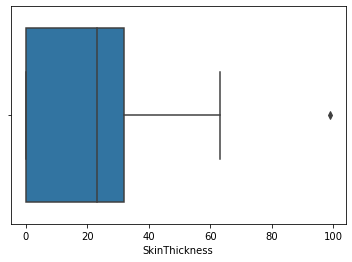

In [22]:
#Checking Ouliers
#Replacing outliers
sns.boxplot(df1["SkinThickness"])
plt.show()

In [ ]:
df1.loc[df1['SkinThickness']>80, 'SkinThickness'] = df1['SkinThickness'].median()
sns.boxplot(df1["SkinThickness"])

In [ ]:
sns.boxplot(df1["Pregnancies"])
plt.show()

In [ ]:
df1.loc[df1['Pregnancies']>13, 'Pregnancies'] = df1['Pregnancies'].median()
sns.boxplot(df1["Pregnancies"])

In [ ]:
sns.boxplot(df1["BMI"])
plt.show()

In [ ]:
df1.loc[df1['BMI']>45,'BMI'] = df1['BMI'].median()
df1.loc[df1['BMI']<5,'BMI'] = df1['BMI'].median()
sns.boxplot(df1["BMI"])

In [ ]:
sns.boxplot(df1["Glucose"])
plt.show()

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

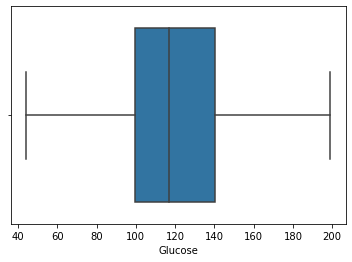

In [23]:
df1.loc[df1['Glucose']<5, 'Glucose'] = df1['Glucose'].median()
sns.boxplot(df1["Glucose"])

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

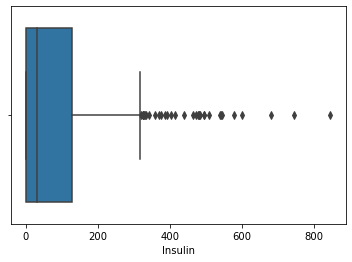

In [24]:
sns.boxplot(df1["Insulin"])
plt.show()

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

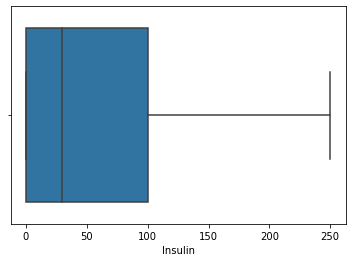

In [25]:
df1.loc[df1['Insulin']>250, 'Insulin'] = df1['Insulin'].median()
sns.boxplot(df1["Insulin"])

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

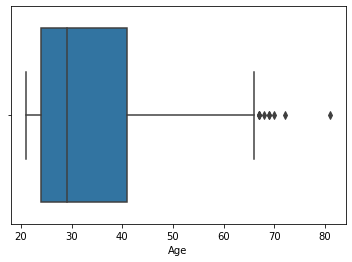

In [26]:
sns.boxplot(df1["Age"])
plt.show()

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

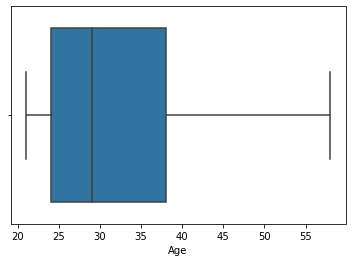

In [27]:
df1.loc[df1['Age']>58, 'Age'] = df1['Age'].median()
sns.boxplot(df1["Age"])

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

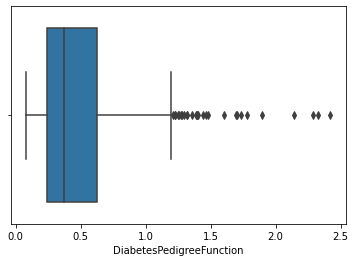

In [28]:
sns.boxplot(df1["DiabetesPedigreeFunction"])
plt.show()

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

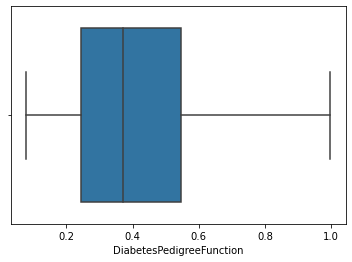

In [29]:
df1.loc[df1['DiabetesPedigreeFunction']>1.0, 'DiabetesPedigreeFunction'] = df1['DiabetesPedigreeFunction'].median()
sns.boxplot(df1["DiabetesPedigreeFunction"])

In [30]:
#Construct new data
df1.to_csv('newdata.csv', index=False)

# Constructing dataset

In [31]:
#Constructing new cleaned dataset
df1.to_csv('newdata.csv', index=False)


In [32]:
df1.head()

,Patient ID,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148,35,0.0,33.6,0.6270,50,1
1,2,1.0,85,29,0.0,26.6,0.3510,31,0
2,3,8.0,183,0,0.0,23.3,0.6720,32,1
3,4,1.0,89,23,94.0,28.1,0.1670,21,0
4,5,0.0,137,35,168.0,43.1,0.3725,33,1


In [33]:
#df1=df1.toPandas()

In [34]:
#reading dataset 2
df2.head()

,Patient ID,BloodPressure
0,1,72
1,2,66
2,3,64
3,4,66
4,5,40


In [35]:
#Checking number of rows and columns in dataset 2
df2.shape

(768, 2)

In [36]:
#checking datatype of dataset 2
df2.dtypes

Patient ID       int32
BloodPressure    int32
dtype: object

In [37]:
#checking missing value
df2.isnull().sum().sum()

0

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

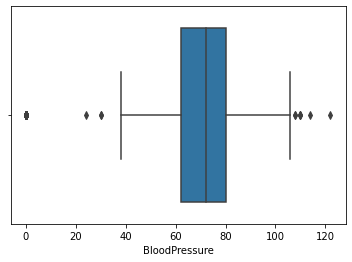

In [38]:
#checking outliers
sns.boxplot(df2["BloodPressure"])
plt.show()

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

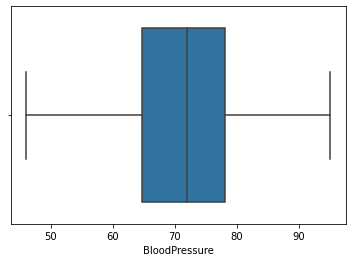

In [39]:
#Replacing outliers
df2.loc[df2['BloodPressure']>95, 'BloodPressure'] = df2['BloodPressure'].median()
df2.loc[df2['BloodPressure']<45, 'BloodPressure'] = df2['BloodPressure'].median()
sns.boxplot(df2["BloodPressure"])

In [40]:
#Constructed new cleaned dataset 2
df2.to_csv('newdata2.csv', index=False)

In [41]:
df2.head()

,Patient ID,BloodPressure
0,1,72
1,2,66
2,3,64
3,4,66
4,5,72


# Integrating various sources

In [42]:
#Merging both cleaned datasets
df=df2.merge(df1, on=["Patient ID"])

In [43]:
#Reading cleaned merged dataset
df.head()

,Patient ID,BloodPressure,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,72,6.0,148,35,0.0,33.6,0.6270,50,1
1,2,66,1.0,85,29,0.0,26.6,0.3510,31,0
2,3,64,8.0,183,0,0.0,23.3,0.6720,32,1
3,4,66,1.0,89,23,94.0,28.1,0.1670,21,0
4,5,72,0.0,137,35,168.0,43.1,0.3725,33,1


In [44]:
#Formatting the data
df.sort_values(by=['Age'])
      

,Patient ID,BloodPressure,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
255,256,64,1.0,113,35,0.0,33.6,0.5430,21,1
60,61,72,2.0,84,0,0.0,0.0,0.3040,21,0
102,103,72,0.0,125,0,0.0,22.5,0.2620,21,0
182,183,74,1.0,117,20,23.0,27.7,0.2990,21,0
623,624,70,0.0,94,27,115.0,43.5,0.3470,21,0
...,...,...,...,...,...,...,...,...,...,...
487,488,78,0.0,173,32,30.5,46.5,0.3725,58,0
512,513,68,9.0,91,0,0.0,24.2,0.2000,58,0
388,389,82,5.0,144,26,30.5,32.0,0.4520,58,1
375,376,82,12.0,140,43,30.5,39.2,0.5280,58,1


In [45]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Balancing Data

In [46]:
#Statistical Transformation
X = df.copy()
y = X['Outcome']
X = X.drop(['Outcome'], axis=1)
counter = Counter(y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 500, 1: 268})
Counter({1: 500, 0: 500})


In [47]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


== 4.2 Multivariate Plots: Multivariate Plots:scatter plot matrix. why? to spot structured relationships between input variables ==


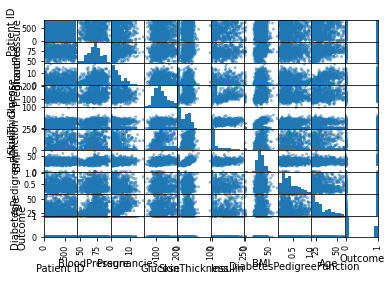

In [48]:
print("== 4.2 Multivariate Plots: Multivariate Plots:scatter plot matrix. why? to spot structured relationships between input variables ==")
scatter_matrix(df)
plt.show()

In [49]:
df.head()

,Patient ID,BloodPressure,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,72,6.0,148,35,0.0,33.6,0.6270,50,1
1,2,66,1.0,85,29,0.0,26.6,0.3510,31,0
2,3,64,8.0,183,0,0.0,23.3,0.6720,32,1
3,4,66,1.0,89,23,94.0,28.1,0.1670,21,0
4,5,72,0.0,137,35,168.0,43.1,0.3725,33,1


 == 4.1 Univariate Plots: histograms. why? to determine if the distribution is normal-like? == 


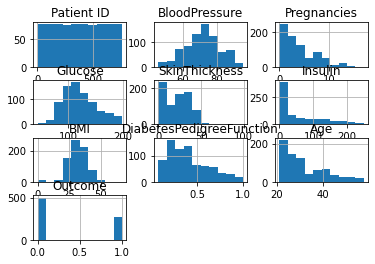

In [50]:
print(" == 4.1 Univariate Plots: histograms. why? to determine if the distribution is normal-like? == ")
df.hist()
plt.show()

In [51]:

import matplotlib.pyplot as plt
import numpy as np


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X=df.drop("Outcome", axis=1)
Y=df["Outcome"]
print (df.head())

print (X.head())
print (Y.head())

   Patient ID  BloodPressure  Pregnancies  Glucose  SkinThickness  Insulin  \
0           1             72          6.0      148             35      0.0   
1           2             66          1.0       85             29      0.0   
2           3             64          8.0      183              0      0.0   
3           4             66          1.0       89             23     94.0   
4           5             72          0.0      137             35    168.0   

    BMI  DiabetesPedigreeFunction  Age  Outcome  
0  33.6                    0.6270   50        1  
1  26.6                    0.3510   31        0  
2  23.3                    0.6720   32        1  
3  28.1                    0.1670   21        0  
4  43.1                    0.3725   33        1  
   Patient ID  BloodPressure  Pregnancies  Glucose  SkinThickness  Insulin  \
0           1             72          6.0      148             35      0.0   
1           2             66          1.0       85             29      0.0 

# Data Transformation

# Feature Selection

(537, 9) (231, 9)
AxesSubplot(0.125,0.125;0.62x0.755)


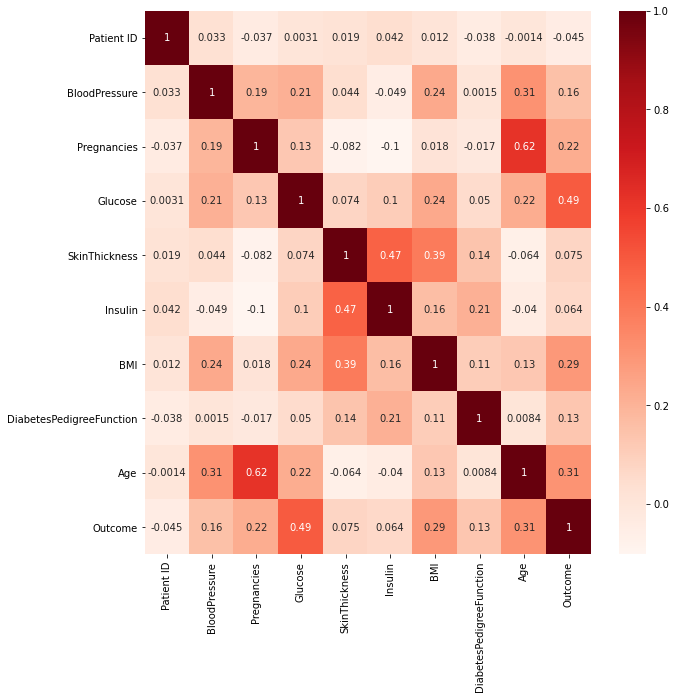

                          Patient ID  BloodPressure  Pregnancies   Glucose  \
Patient ID                  1.000000       0.032934    -0.037201  0.003088   
BloodPressure               0.032934       1.000000     0.190927  0.211833   
Pregnancies                -0.037201       0.190927     1.000000  0.128213   
Glucose                     0.003088       0.211833     0.128213  1.000000   
SkinThickness               0.019006       0.043614    -0.081672  0.074455   
Insulin                     0.042036      -0.049364    -0.102464  0.104450   
BMI                         0.012320       0.235669     0.017683  0.235035   
DiabetesPedigreeFunction   -0.038030       0.001455    -0.017337  0.050492   
Age                        -0.001390       0.314630     0.618936  0.224403   
Outcome                    -0.045184       0.155241     0.221898  0.492782   

                          SkinThickness   Insulin       BMI  \
Patient ID                     0.019006  0.042036  0.012320   
BloodPressure  

In [54]:


X_train, X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)

plt.figure(figsize=(10,10))
cor=X_train.corr()
print (sns.heatmap(df.corr(), cmap='Reds', annot=True))
plt.show()
print (df.corr())


AxesSubplot(0.125,0.125;0.62x0.755)


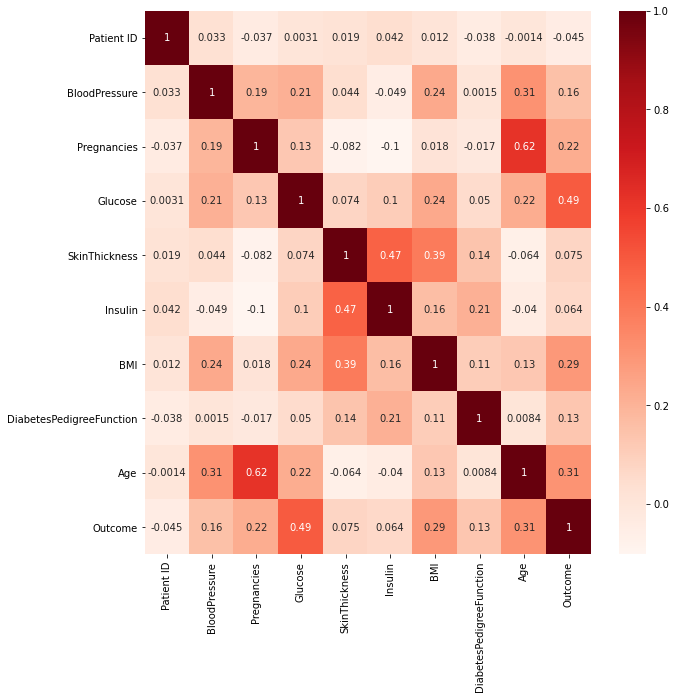

                          Patient ID  BloodPressure  Pregnancies   Glucose  \
Patient ID                  1.000000       0.032934    -0.037201  0.003088   
BloodPressure               0.032934       1.000000     0.190927  0.211833   
Pregnancies                -0.037201       0.190927     1.000000  0.128213   
Glucose                     0.003088       0.211833     0.128213  1.000000   
SkinThickness               0.019006       0.043614    -0.081672  0.074455   
Insulin                     0.042036      -0.049364    -0.102464  0.104450   
BMI                         0.012320       0.235669     0.017683  0.235035   
DiabetesPedigreeFunction   -0.038030       0.001455    -0.017337  0.050492   
Age                        -0.001390       0.314630     0.618936  0.224403   
Outcome                    -0.045184       0.155241     0.221898  0.492782   

                          SkinThickness   Insulin       BMI  \
Patient ID                     0.019006  0.042036  0.012320   
BloodPressure  

In [55]:
plt.figure(figsize=(10,10))
cor=X_train.corr()
print (sns.heatmap(df.corr(), cmap='Reds', annot=True))
plt.show()
print (df.corr())


In [56]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)

(537, 9) (231, 9)


# Reducing Data

In [57]:
df = df.drop("Insulin", axis=1)

In [58]:
df.head()

,Patient ID,BloodPressure,Pregnancies,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,72,6.0,148,35,33.6,0.6270,50,1
1,2,66,1.0,85,29,26.6,0.3510,31,0
2,3,64,8.0,183,0,23.3,0.6720,32,1
3,4,66,1.0,89,23,28.1,0.1670,21,0
4,5,72,0.0,137,35,43.1,0.3725,33,1


In [59]:
df = df.drop("SkinThickness", axis=1)

In [60]:
df.head()


,Patient ID,BloodPressure,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,72,6.0,148,33.6,0.6270,50,1
1,2,66,1.0,85,26.6,0.3510,31,0
2,3,64,8.0,183,23.3,0.6720,32,1
3,4,66,1.0,89,28.1,0.1670,21,0
4,5,72,0.0,137,43.1,0.3725,33,1


In [61]:
df = df.drop("Patient ID", axis=1)

In [62]:
df.head()


,BloodPressure,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,72,6.0,148,33.6,0.6270,50,1
1,66,1.0,85,26.6,0.3510,31,0
2,64,8.0,183,23.3,0.6720,32,1
3,66,1.0,89,28.1,0.1670,21,0
4,72,0.0,137,43.1,0.3725,33,1


In [63]:
df.shape

(768, 7)

# Creating cleaned data frame

In [64]:
df.to_csv('cleaneddata.csv', index=False)

In [65]:
df.head

<bound method NDFrame.head of      BloodPressure  Pregnancies  Glucose   BMI  DiabetesPedigreeFunction  Age  \
0               72          6.0      148  33.6                    0.6270   50   
1               66          1.0       85  26.6                    0.3510   31   
2               64          8.0      183  23.3                    0.6720   32   
3               66          1.0       89  28.1                    0.1670   21   
4               72          0.0      137  43.1                    0.3725   33   
..             ...          ...      ...   ...                       ...  ...   
763             76         10.0      101  32.9                    0.1710   29   
764             70          2.0      122  36.8                    0.3400   27   
765             72          5.0      121  26.2                    0.2450   30   
766             60          1.0      126  30.1                    0.3490   47   
767             70          1.0       93  30.4                    0.3150   23  

# 7.3 Pattern Search and visualization

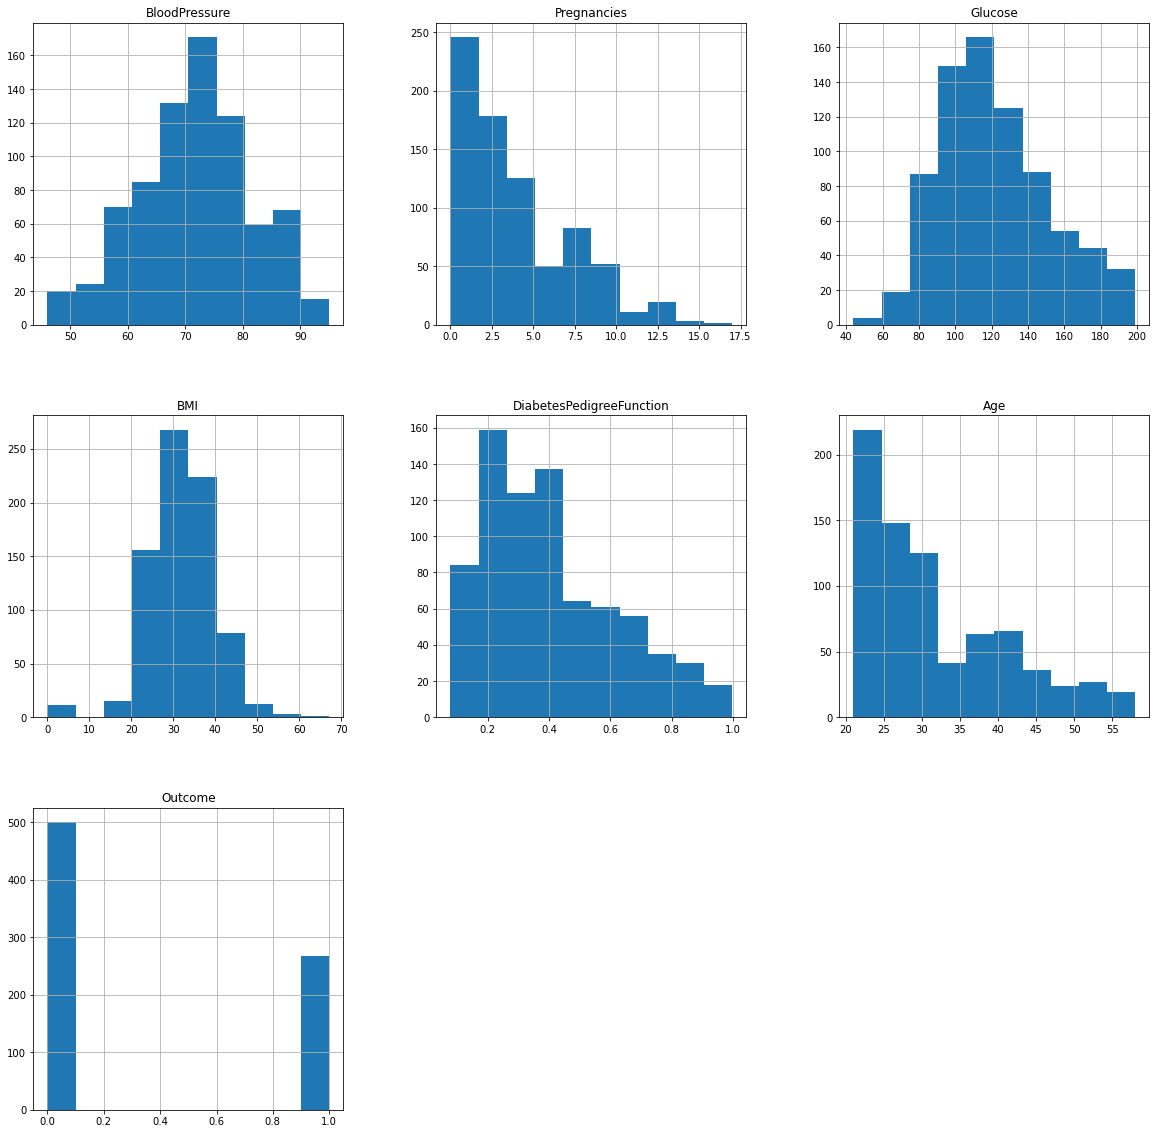

In [66]:
p=df.hist(figsize = (20,20))

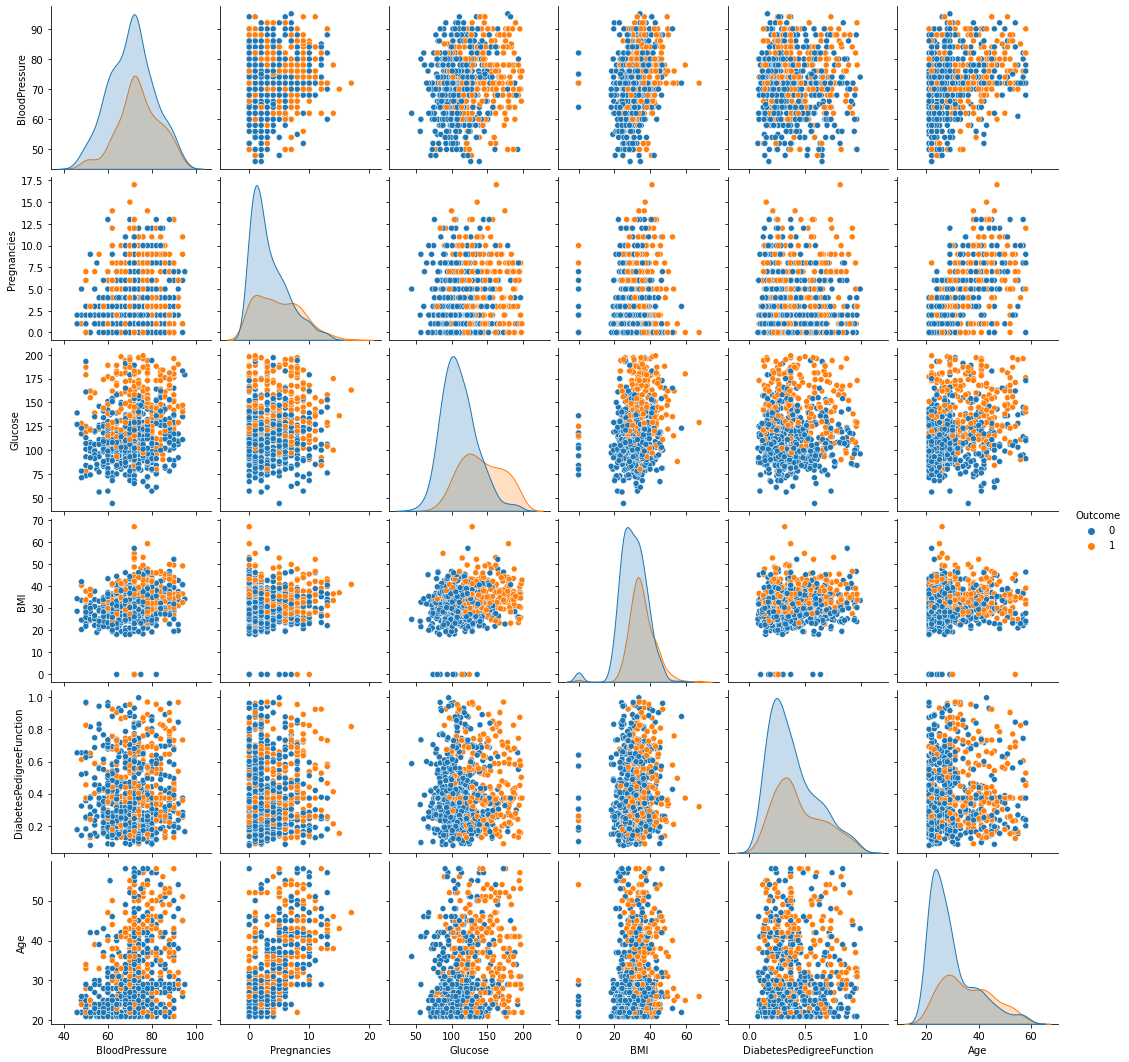

In [67]:
sns.pairplot(df,hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

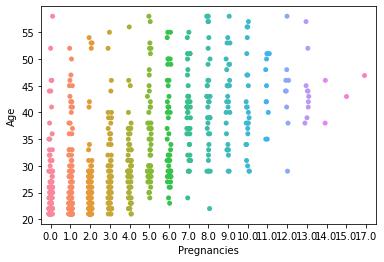

In [68]:
sns.stripplot(x='Pregnancies',y='Age',data=df)

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

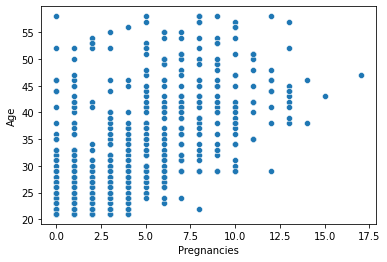

In [69]:
sns.scatterplot(x='Pregnancies',y='Age',data=df)

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

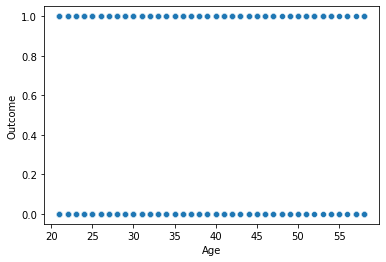

In [70]:
sns.scatterplot(x='Age',y='Outcome',data=df)

<AxesSubplot:xlabel='BMI', ylabel='DiabetesPedigreeFunction'>

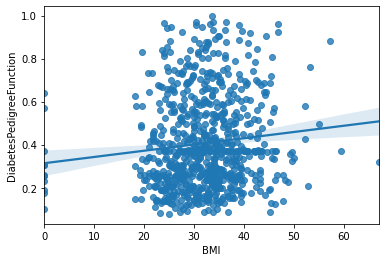

In [71]:
sns.regplot(x='BMI', y= 'DiabetesPedigreeFunction', data=df)

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

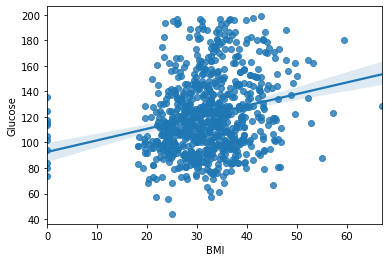

In [72]:
sns.regplot(x='BMI', y= 'Glucose', data=df)

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.3% of the points

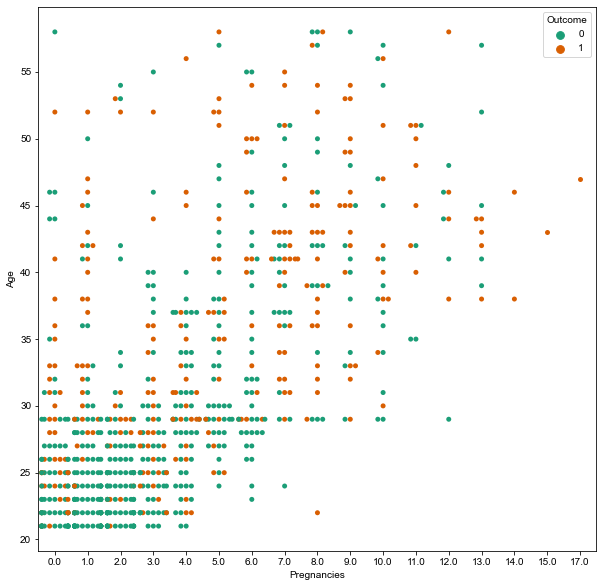

In [73]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="Pregnancies", y="Age", hue="Outcome",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points

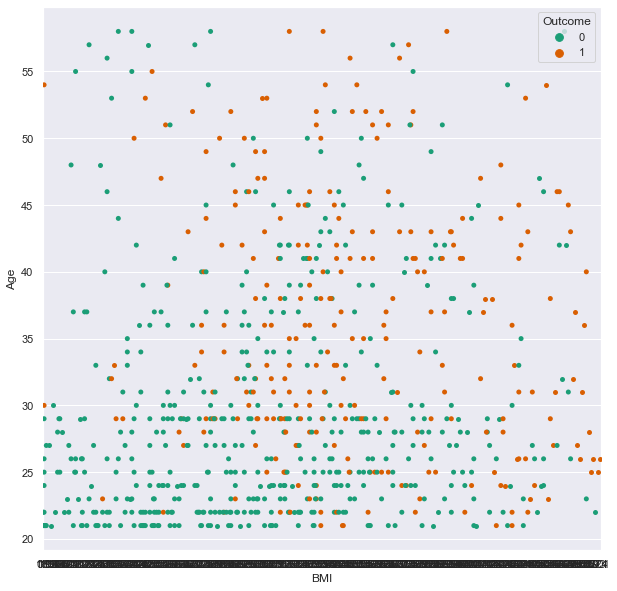

In [74]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="BMI", y="Age", hue="Outcome",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

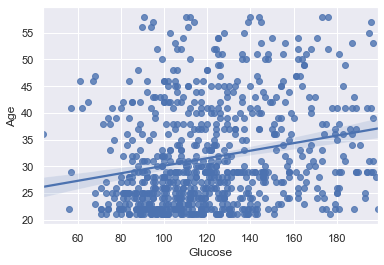

In [75]:
sns.regplot(x='Glucose', y= 'Age', data=df)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

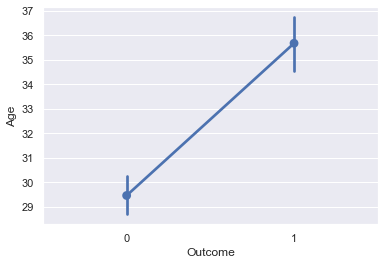

In [76]:
sns.pointplot(x='Outcome', y= 'Age', data=df)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

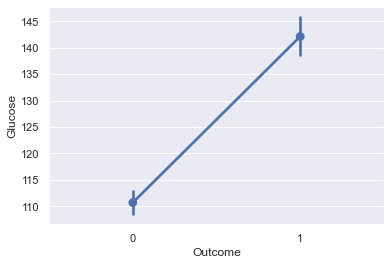

In [77]:
sns.pointplot(x='Outcome', y= 'Glucose', data=df)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

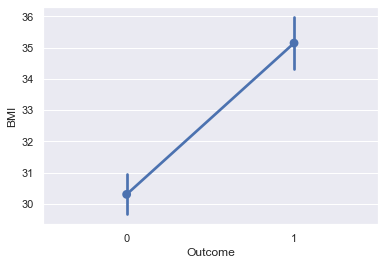

In [78]:
sns.pointplot(x='Outcome', y= 'BMI', data=df)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

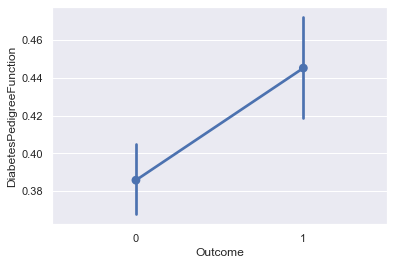

In [79]:
sns.pointplot(x='Outcome', y= 'DiabetesPedigreeFunction', data=df)

In [80]:

falsediabetes= df.loc[df['Outcome']==0]

In [81]:
trueddiabetes= df.loc[df['Outcome']==1]

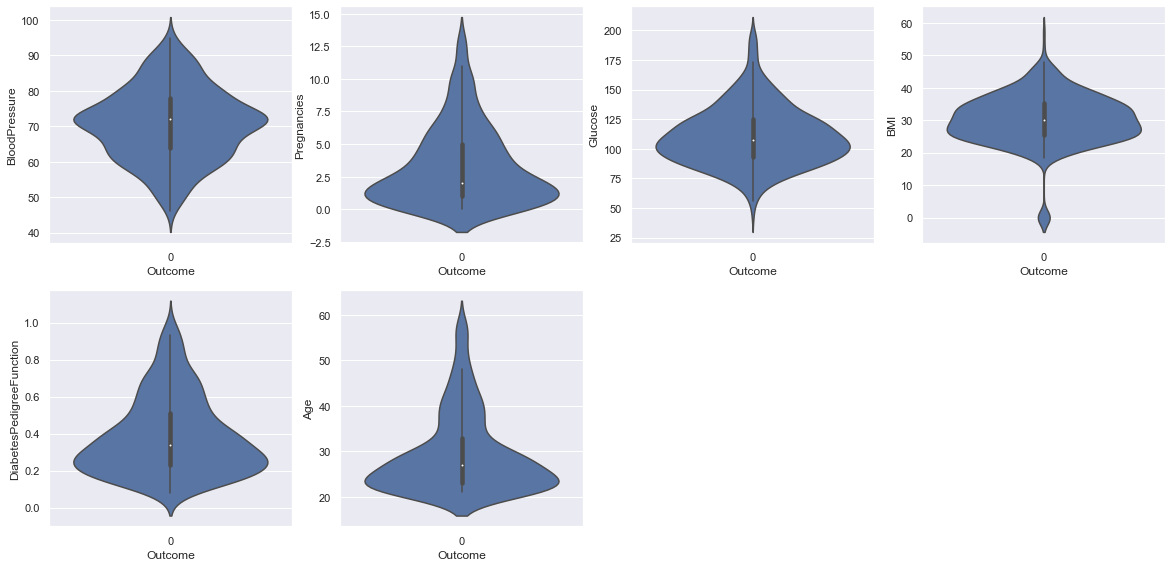

In [82]:

plt.figure(figsize=(20, 20))

for column_index, column in enumerate(falsediabetes.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.violinplot(x='Outcome', y=column, data=falsediabetes)

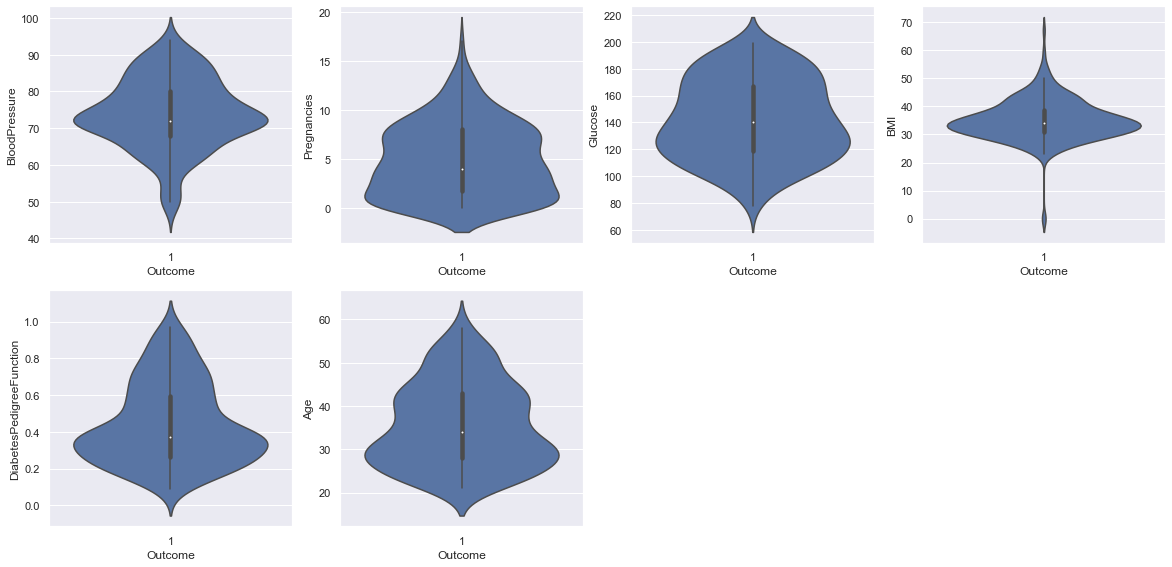

In [83]:
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(trueddiabetes.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.violinplot(x='Outcome', y=column, data=trueddiabetes)

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


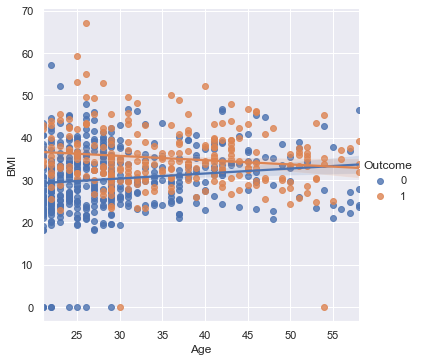

In [84]:

sns.lmplot('Age','BMI',hue='Outcome',data=df)

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


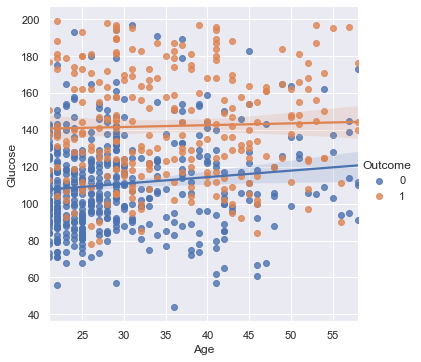

In [85]:
sns.lmplot('Age','Glucose',hue='Outcome',data=df)

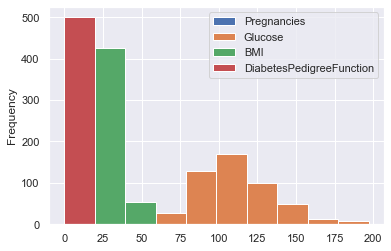

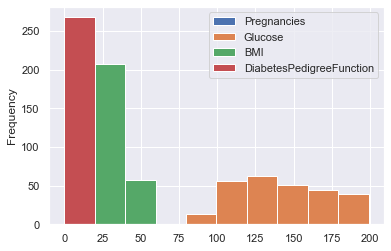

In [86]:
grouped_data=df.groupby('Outcome')[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']].plot.hist()

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


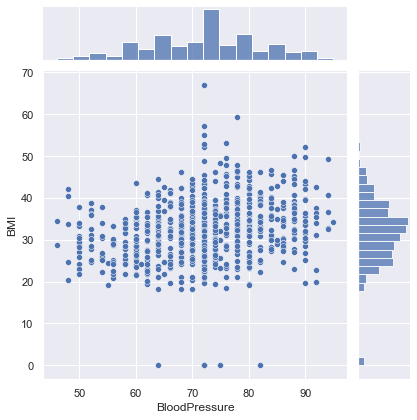

In [87]:

## Is BloodPressure related to BMI?
sns.jointplot(df['BloodPressure'],df['BMI'])

C:\Users\Dolly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

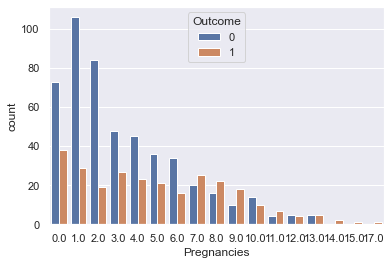

In [88]:
# To find max pregmancy women who were Diabetic
sns.countplot(df['Pregnancies'],hue=df['Outcome'])